In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=150

# Problem Statment:
Build a prediction model for Salary_hike


In [2]:
salary_data=pd.read_csv(r"C:\Users\Shivani Kharade\Desktop\DS ExcelR\Assignments\Simple Linear Regression\Salary_Data.csv")
salary_data.head(14)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# checking the null values and datatypes
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
# Checking duplicate values
salary_data[salary_data.duplicated(keep = False)]

,YearsExperience,Salary


In [5]:
# Checking for correlation between the variables
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
salary01 = salary_data.rename({'YearsExperience': 'YrExp'}, axis=1)
salary01.head()

,YrExp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
# boxplot:
#To Check the outliers in the data set

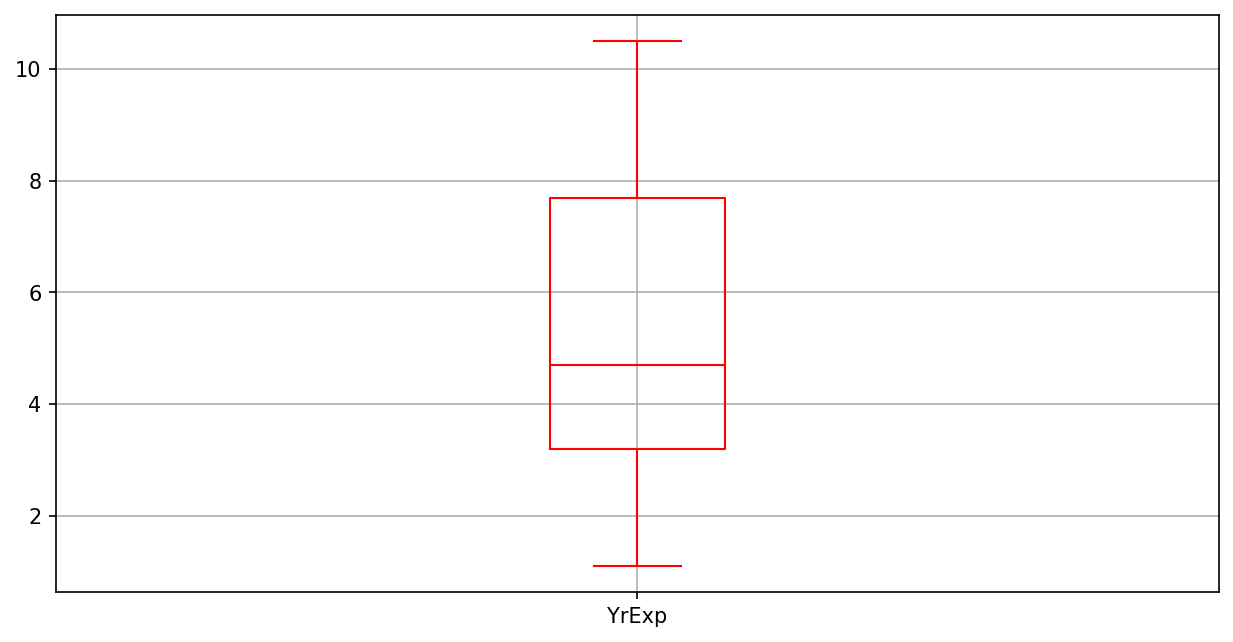

In [8]:
salary01.boxplot(column=['YrExp'],color='Red')
plt.show()

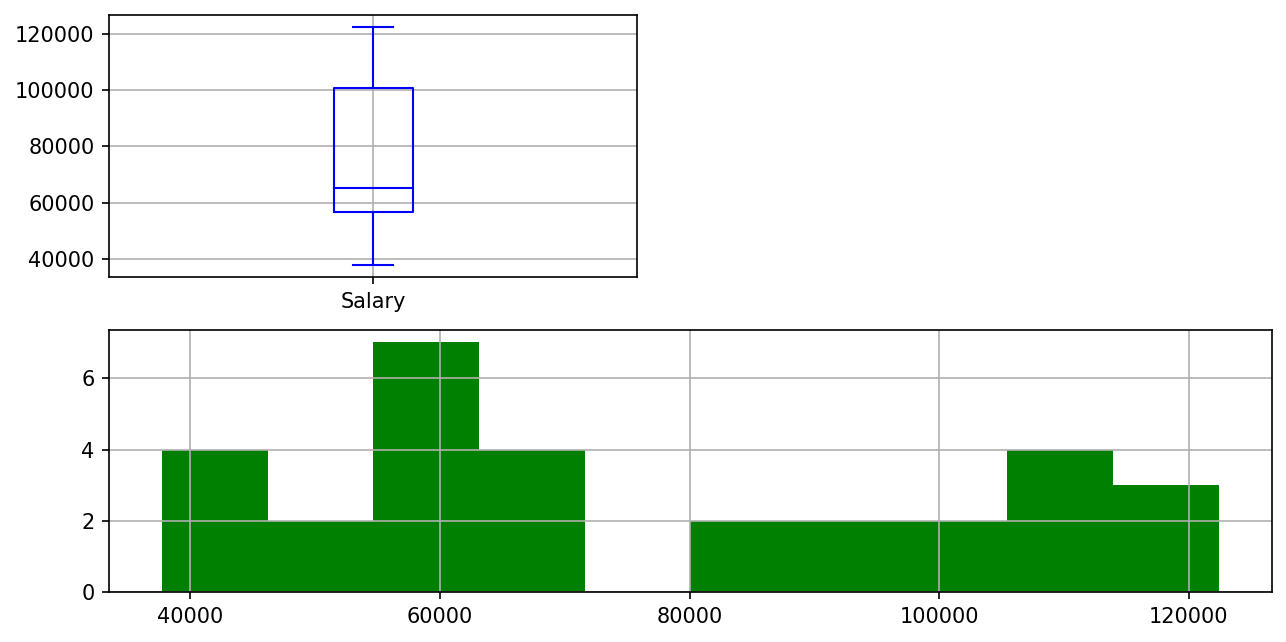

In [9]:
plt.subplot(2,1,2)
salary01['Salary'].hist(color='green')
plt.subplot(2,2,1)
salary01.boxplot(column=['Salary'],color='blue')
plt.show()

In [10]:
# Cheking if the data is normally distributed, using distplot

In [11]:
sns.distplot(salary01['YrExp'],color='green')

<Axes: xlabel='YrExp', ylabel='Density'>

In [12]:
sns.distplot(salary01['Salary'],color='violet')

<Axes: xlabel='Salary', ylabel='Density'>

In [13]:
# Model1
#Creating a model, without applying Transformations

In [14]:
model1 = smf.ols("Salary~YrExp",data = salary01).fit()

In [15]:
sns.regplot(x="YrExp", y="Salary", data = salary01,marker="*",color='orange' )

<Axes: xlabel='YrExp', ylabel='Salary'>

In [16]:
# Checking coefficients

In [17]:
model1.params

Intercept    25792.200199
YrExp         9449.962321
dtype: float64

In [18]:
# Checking the T & p-values

In [19]:
print(model1.tvalues, '\n', model1.pvalues)  

Intercept    11.346940
YrExp        24.950094
dtype: float64 
 Intercept    5.511950e-12
YrExp        1.143068e-20
dtype: float64


In [20]:
# R-squared and Adj R-squared values 

In [21]:
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        20:57:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YrExp       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Checking the RMSE value

In [24]:
pred1 = model1.predict(salary01.YrExp)
pred1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [25]:
actual = salary01.Salary

In [26]:
r1=rmse(pred1,actual)
r1

31270951.72228097

In [27]:
# Model2- 
# Creating a new model, by applying Logarithmic Transformation 

In [28]:
model2 = smf.ols("Salary~np.log(YrExp)",data = salary01).fit()

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           3.25e-13
Time:                        20:57:57   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YrExp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Checking the RMSE value

In [31]:
pred2 = model2.predict(salary01.YrExp)
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [32]:
r2=rmse(pred2,actual)
r2

106149618.72183888

In [33]:
# Model3-
# Creating an new model, by taking exponential transformation

In [34]:
model3 = smf.ols("np.log(Salary)~(YrExp)",data = salary01).fit()

In [35]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           7.03e-18
Time:                        20:57:57   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YrExp          0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Checking the RMSE value

In [37]:
pred3=np.exp(model3.predict(salary01.YrExp))

In [38]:
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [39]:
r3=rmse(pred3,actual)
r3

52030760.270583

In [40]:
#  Model 4-
# Creating a new model, by making a quadratic equation

In [41]:
salary01["YrExpsqr"]=salary01["YrExp"]*salary01["YrExp"]

In [42]:
model4 = smf.ols("np.log(Salary)~(YrExp)+(YrExpsqr)",data = salary01).fit()

In [43]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           3.95e-18
Time:                        20:57:57   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
YrExp          0.2024      0.027      7.601      0.000       0.148       0.257
YrExpsqr      -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Checking the RMSE value

In [45]:
pred4=np.exp(model4.predict(salary01))

In [46]:
pred4

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [47]:
r4=rmse(pred4,actual)
r4

29063760.631258395

In [48]:
# Consolidating all results

In [49]:
t={"Model":pd.Series(["Model1","Model2","Model3","Model4"]),
     "Rsquared":(model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared),
     "RMSE":(r1,r2,r3,r4)
    }
t=pd.DataFrame(t)
t

,Model,Rsquared,RMSE
0,Model1,0.956957,3.127095e+07
1,Model2,0.853889,1.061496e+08
2,Model3,0.931967,5.203076e+07
3,Model4,0.948611,2.906376e+07


## Inference:
### Based upon the observation among all the models higher R-squared value is 0.957 which is model 1. And the RMSE value is lower in the model 4 among all the models.
### The better model should have the higher R-squared value and lower RMSE value.Hence the model 1, is better model to predict Salary_hike.In real time rather than checking the error we need more accuracy in salary hike